In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/DAAG/spam7.csv')

df.drop('Unnamed: 0', axis=1, inplace=True)


y = df.yesno.apply(lambda x: 0 if x == 'y' else 1)

df.drop('yesno', axis=1, inplace=True)

for i in range(0,6):
    for j in range(i+1,6):
        df[str(i)+str(j)] = df.iloc[:,i] * df.iloc[:,j]

X_train, X_test, y_train, y_test = train_test_split(df, y, random_state=42, test_size=0.2)

gbc = b

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

accuracy_score(y_pred, y_test)

0.8653637350705755

In [3]:
gbc.score(X_test, y_test)

0.8653637350705755

In [4]:
fl = gbc.feature_importances_

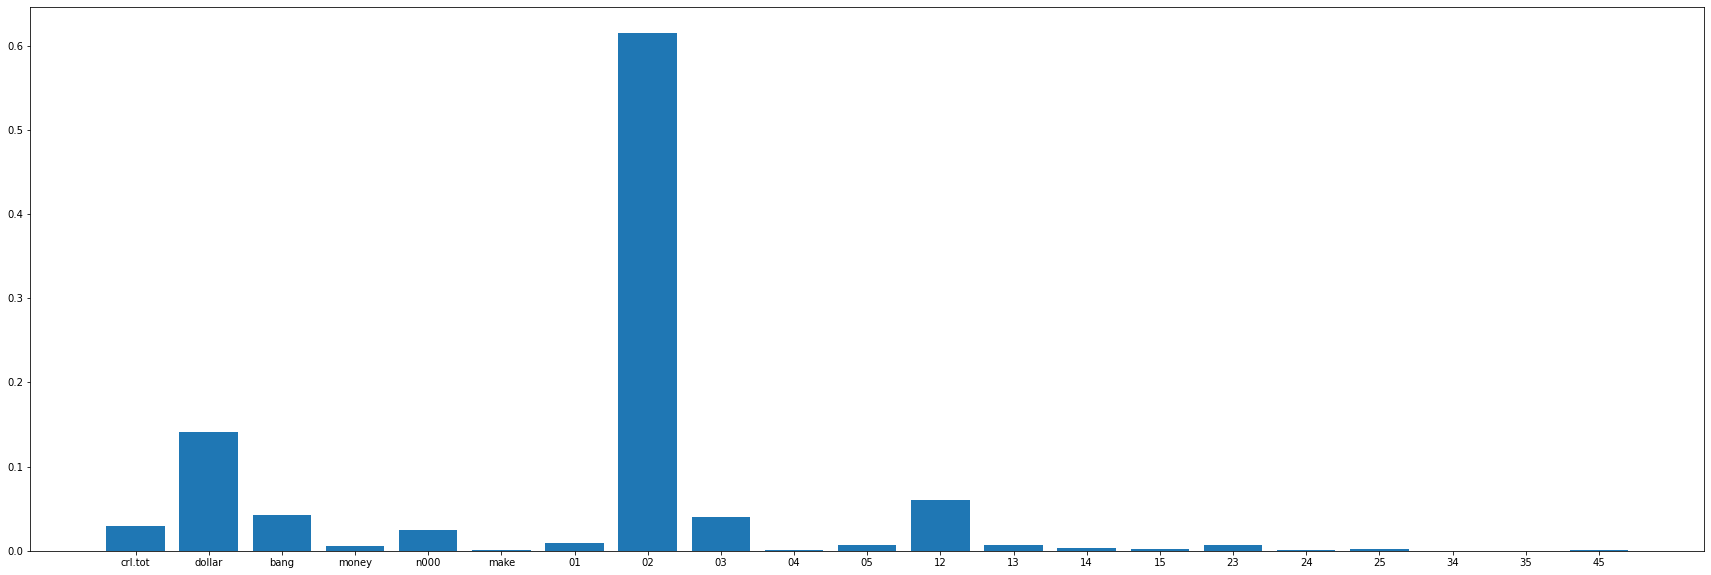

In [5]:
fig, ax = plt.subplots()
fig.set_figwidth(30)  
fig.set_figheight(10)
x = np.arange(len(fl))
plt.xticks(x, df.columns)
plt.bar(x, fl)
plt.show()

In [7]:
param_grid = {'learning_rate':[0.00001, 0.0001, 0.001, 0.01, 0.1, 1], 
              'n_estimators':[100, 250, 500, 750, 1000, 1250, 1500, 1750]}
clf = GridSearchCV(
        gbc, param_grid, scoring='accuracy', n_jobs=-1, cv=5)
clf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             n_jobs=-1,
             param_grid={'learning_rate': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1],
                         'n_estimators': [100, 250, 500, 750, 1000, 1250, 1500,
                                          1750]},
             scoring='accuracy')

In [11]:
clf.best_score_

0.8836956521739131

In [12]:
clf.best_params_

{'learning_rate': 0.01, 'n_estimators': 1250}

In [22]:
gbs_best = GradientBoostingClassifier(learning_rate=0.01, n_estimators=1250, random_state=42)

In [24]:
gbs_best

GradientBoostingClassifier(learning_rate=0.01, n_estimators=1250,
                           random_state=42)

In [28]:
param_grid_best = {'max_depth': [x for x in np.arange(5, 16)]}

In [30]:
param_grid_best

{'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]}

In [31]:
clf_best = GridSearchCV(gbs_best, param_grid_best, scoring='accuracy', n_jobs=-1, cv=5)

In [32]:
clf_best.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.01,
                                                  n_estimators=1250,
                                                  random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]},
             scoring='accuracy')

In [33]:
clf_best.best_params_

{'max_depth': 5}